In [165]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
import numpy as np
import matplotlib.pyplot as plt


from neuron_population import NeuronPopulation
from connectome import Connectome
from overhead import Simulation
from connectome_visualization import *

In [167]:
dt = 0.1

In [168]:
# Neuron population parameters
layer_distribution = [2, 12, 12, 2]
n_layers = len(layer_distribution)
neuron_types = ["TRN", "p23", "ss4", "b", "nb"]
n_neuron_types = len(neuron_types)
inhibitory = [False, False, False, True, True]
dist_layer1 = np.array([1, 0, 0, 0, 0])
dist_layer2 = np.array([0, 2, 6, 1, 1])
dist_layer3 = np.array([0, 2, 6, 1, 1])
dist_layer4 = np.array([1, 0, 0, 0, 0])
neuron_distribution = [dist_layer1, dist_layer2, dist_layer3, dist_layer4]
threshold_decay = np.exp(-dt / 5)

In [169]:
neuron_pop = NeuronPopulation(
    layer_distribution,
    neuron_distribution,
    neuron_types,
    inhibitory,
    threshold_decay,
    threshold_mult=1.15
)

In [170]:
# Connectome
max_synapses = 12
synapse_strength = np.ones((n_layers, n_layers))
# neuron_types = ["p23", "TRN", "b", "nb"]
connectivity_probability = np.ones((n_layers, n_layers, n_neuron_types, n_neuron_types+2))


connectivity_probability[:,:,:,-2] = 0.0  # Self connections
# Number of connections 
# For p23
connectivity_probability[:,:,1,-1] = 0.2
# For ss4
connectivity_probability[:,:,2,-1] = 0.8
# For b
connectivity_probability[:,:,3,-1] = 0.8
# For nb
connectivity_probability[:,:,4,-1] = 0.8
# For input TRN
connectivity_probability[:,0,0,-1] = 0.0
# No inter-connections for input and output layers
connectivity_probability[0, 0, :, :-2] = 0
connectivity_probability[2, 2, :, :-2] = 0
# Only flow in one direction
connectivity_probability[1, 0, :, :-2] = 0.0
connectivity_probability[2, 1, :, :-2] = 0.0
connectivity_probability[2, 0, :, :-2] = 0.0
# No jump from input to output
connectivity_probability[0, 2, :, :-2] = 0.0

In [171]:
connectome = Connectome(
    max_synapses,
    neuron_pop,
    connectivity_probability,
    synapse_strength,
)

In [172]:
connectome.M

array([[26, 13, 13,  6, 27,  4, 10,  9,  3,  5, 26,  2],
       [ 7, 12, 27,  6, 11, 13,  8, 26,  7,  8,  5,  3],
       [ 0,  0,  0,  0,  0,  0,  0, 21,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  9,  0],
       [ 0,  0, 21,  0, 24,  0, 24, 12,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 27,  3,  0,  0,  0, 24,  0,  0],
       [ 3, 23, 22, 12,  3, 13, 17, 13, 26, 27,  0, 13],
       [ 7, 27, 17,  0, 19, 13, 14, 13, 13, 19, 20, 23],
       [ 0,  0,  5,  0, 24,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0, 14,  0,  0,  8,  0,  0,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 27, 27,  0,  0,  0,  0,  0,  0,  0, 26,  0],
       [26,  0,  0,  0, 26,  0, 27, 27,  0,  0,  0, 26],
       [26,  0,  0,  0,  0,  0,

In [173]:
connectome.NC

array([[False, False, False, False, False, False, False, False, False,
        False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False],
       [ True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True, False,  True,  True,  True,
         True, False,  True],
       [ True,  True, False,  True, False,  True, False, False,  True,
         True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True],
       [ True,  True,  True,  True, False, False,  True,  True,  True,
        False,  True,  True],
       [False, False, False, False, False, False, False, False, False,
        False,  True, False],
       [False, False, False,  True, False, False, False, False, False,
        False, False, False],
       [ True,  True, False,  True, False,  True,  True, False,  True,
         True,  True

In [174]:
outw, inw, total = connectome.connections_per_neuron()
# print("Connections per neuron:")
# print("Out:", outw)
# print("In:", inw)
# print("Total:", total)

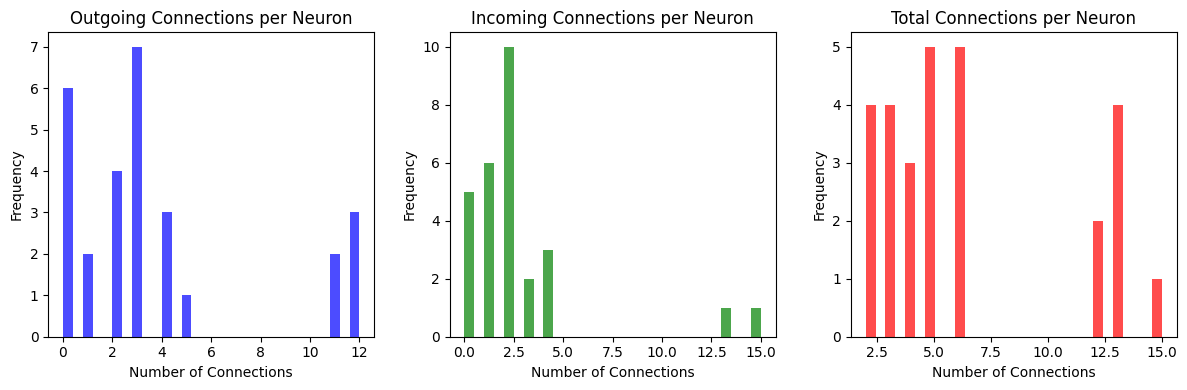

In [175]:
# Plot 3 connections histograms
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(outw, bins=30, color='blue', alpha=0.7, label='Outgoing')
plt.title('Outgoing Connections per Neuron')
plt.xlabel('Number of Connections')
plt.ylabel('Frequency')
plt.subplot(1, 3, 2)
plt.hist(inw, bins=30, color='green', alpha=0.7, label='Incoming')
plt.title('Incoming Connections per Neuron')
plt.xlabel('Number of Connections')
plt.ylabel('Frequency')
plt.subplot(1, 3, 3)
plt.hist(total, bins=30, color='red', alpha=0.7, label='Total')
plt.title('Total Connections per Neuron')
plt.xlabel('Number of Connections')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

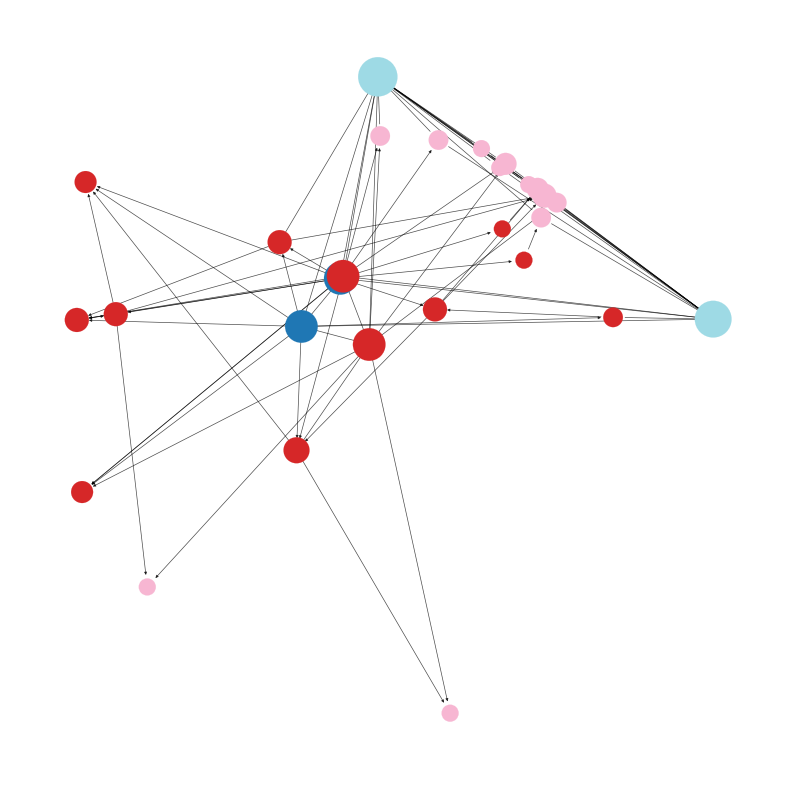

my_net.html
✅  Saved interactive graph to my_net.html


In [176]:
G = connectome_to_nx(connectome)  # build the graph

quickplot(G)                         # a fast matplotlib sketch

interactive(G, "my_net.html", notebook=True)        # rich, zoomable HTML – open in a browser

Nodes: 28, Edges: 72
In-degree dist: Counter({2: 10, 1: 6, 0: 5, 4: 3, 3: 2, 13: 1, 15: 1})
Out-degree dist: Counter({2: 10, 0: 6, 1: 4, 3: 4, 10: 2, 8: 2})
Total-degree dist: Counter({2: 7, 5: 5, 3: 5, 10: 4, 4: 4, 6: 1, 13: 1, 15: 1})


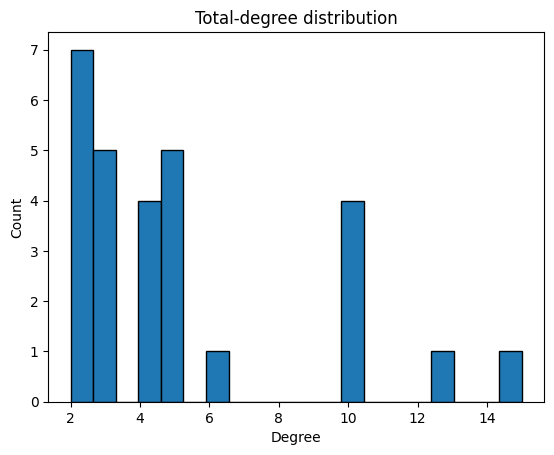

Weakly CCs: 1, Strongly CCs: 26
Largest WCC size (nodes): 28
Largest WCC size (edges): 72
Top 5 by in-degree centrality: [(27, 0.5555555555555556), (26, 0.48148148148148145), (3, 0.14814814814814814), (5, 0.14814814814814814), (13, 0.14814814814814814)]
Top 5 by betweenness centrality: [(8, 0.05698005698005698), (12, 0.05270655270655271), (4, 0.03679962013295347), (7, 0.028015194681861352), (3, 0.017806267806267807)]
Top 5 by closeness centrality: [(27, 0.5782556750298685), (26, 0.5268817204301075), (5, 0.1949317738791423), (20, 0.1610305958132045), (24, 0.1610305958132045)]
Avg clustering (C_G): 0.2698, Transitivity: 0.2025
Avg shortest path (L_G): 2.0767, Diameter: 4
Random avg clustering (C_R): 0.2024
Random avg shortest path (L_R): 2.1005
Small-world coefficient σ = 1.349
In-in assortativity: -0.0905, Out-out assortativity: 0.2283
Top 5 core numbers: [(0, 4), (1, 4), (3, 4), (5, 4), (6, 4)]
Number of directed 3-cycles: 0


In [177]:
import networkx as nx
from networkx.algorithms import smallworld
from collections import Counter

# --- 1. Basic stats
n = G.number_of_nodes()
m = G.number_of_edges()
print(f"Nodes: {n}, Edges: {m}")

# --- 2. Degree stats
in_deg  = dict(G.in_degree())
out_deg = dict(G.out_degree())
tot_deg = {i: in_deg.get(i,0) + out_deg.get(i,0) for i in G.nodes}

# Degree distributions
print("In-degree dist:", Counter(in_deg.values()))
print("Out-degree dist:", Counter(out_deg.values()))
print("Total-degree dist:", Counter(tot_deg.values()))

# Optional: histogram of total degree
plt.hist(list(tot_deg.values()), bins=20, edgecolor='black')
plt.title("Total-degree distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# --- 3. Connectivity
wcc = list(nx.weakly_connected_components(G))
scc = list(nx.strongly_connected_components(G))
print(f"Weakly CCs: {len(wcc)}, Strongly CCs: {len(scc)}")

# Largest (weakly) connected subgraph for undirected metrics
Gu = G.to_undirected()
largest_cc = max(nx.connected_components(Gu), key=len)
G_cc = Gu.subgraph(largest_cc).copy()

print(f"Largest WCC size (nodes): {G_cc.number_of_nodes()}")
print(f"Largest WCC size (edges): {G_cc.number_of_edges()}")

# --- 4. Centralities (example: top 5 in‐degree and betweenness)
deg_cent_in  = nx.in_degree_centrality(G)
bw_cent      = nx.betweenness_centrality(G, k=None, normalized=True)  # expensive if k=None
cl_cent      = nx.closeness_centrality(G)

print("Top 5 by in-degree centrality:", sorted(deg_cent_in.items(), key=lambda x: x[1], reverse=True)[:5])
print("Top 5 by betweenness centrality:", sorted(bw_cent.items(), key=lambda x: x[1], reverse=True)[:5])
print("Top 5 by closeness centrality:", sorted(cl_cent.items(), key=lambda x: x[1], reverse=True)[:5])

# --- 5. Clustering & transitivity (undirected)
C_G = nx.average_clustering(G_cc)
T_G = nx.transitivity(G_cc)
print(f"Avg clustering (C_G): {C_G:.4f}, Transitivity: {T_G:.4f}")

# --- 6. Path lengths & diameter
L_G = nx.average_shortest_path_length(G_cc)
diam_G = nx.diameter(G_cc)
print(f"Avg shortest path (L_G): {L_G:.4f}, Diameter: {diam_G}")

# --- 7. Small-world comparison (undirected random G(n,m))
n_cc, m_cc = G_cc.number_of_nodes(), G_cc.number_of_edges()
R = nx.gnm_random_graph(n = n_cc, m = m_cc, seed=42)

C_R = nx.average_clustering(R)
L_R = nx.average_shortest_path_length(R)
sigma  = (C_G / C_R) / (L_G / L_R)
print("Random avg clustering (C_R):", round(C_R,4))
print("Random avg shortest path (L_R):", round(L_R,4))
print(f"Small-world coefficient σ = {sigma:.3f}")

# --- 8. Assortativity (directed)
r_in_in   = nx.degree_assortativity_coefficient(G, x='in',  y='in')
r_out_out = nx.degree_assortativity_coefficient(G, x='out', y='out')
print(f"In-in assortativity: {r_in_in:.4f}, Out-out assortativity: {r_out_out:.4f}")

# --- 9. Core decomposition (undirected)
core_nums = nx.core_number(Gu)
print("Top 5 core numbers:", sorted(core_nums.items(), key=lambda x: x[1], reverse=True)[:5])

# --- 10. Directed triangle count (3-cycles)
count_3 = 0
import itertools
for trio in itertools.combinations(G.nodes, 3):
    for perm in itertools.permutations(trio, 3):
        u,v,w = perm
        if G.has_edge(u, v) and G.has_edge(v, w) and G.has_edge(w, u):
            count_3 += 1
count_3 //= 6
print(f"Number of directed 3-cycles: {count_3}")
